In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.regime_switching.markov_regression import MarkovRegression
from pykrx import stock

# ÏÇºÏÑ±Ï†ÑÏûê ÏùºÎ≥Ñ Îç∞Ïù¥ÌÑ∞ Í∞ÄÏ†∏Ïò§Í∏∞
start_date = "2023-01-01"
end_date = "2025-01-01"
df = stock.get_market_ohlcv_by_date(start_date, end_date, "005930")
df = df[["Ï¢ÖÍ∞Ä"]].copy()
df["ÏàòÏùµÎ•†"] = df["Ï¢ÖÍ∞Ä"].pct_change()
df.dropna(inplace=True)

# ÏàòÏùµÎ•† Í∏∞Î∞ò MSDR Î™®Îç∏
returns = df["ÏàòÏùµÎ•†"]
model = MarkovRegression(returns, k_regimes=2, trend="c", switching_variance=True)
result = model.fit()

# ÏãúÍ∞ÅÌôî: ÏàòÏùµÎ•† + Ï≤¥Ï†ú ÏÉâÏÉÅ
smoothed_probs = result.smoothed_marginal_probabilities
dates = returns.index


# Í≤∞Í≥º ÏöîÏïΩ
print(result.summary())


                        Markov Switching Model Results                        
Dep. Variable:                    ÏàòÏùµÎ•†   No. Observations:                  488
Model:               MarkovRegression   Log Likelihood                1317.611
Date:                Tue, 27 May 2025   AIC                          -2623.222
Time:                        08:35:49   BIC                          -2598.080
Sample:                             0   HQIC                         -2613.346
                                - 488                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0005      0.001     -0.575      0.565      -0.002       0.001
sigma2         0.0002   4.63e-05      3.916   

/home/restful3/anaconda3/envs/ml4t/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


### ‚úÖ Regime 0 (Ï≤¥Ï†ú 0)

* `const`: -0.0005 ‚Üí ÏàòÏùµÎ•†Ïù¥ Í±∞Ïùò 0Ïóê Í∞ÄÍπåÏõÄ
* `sigma2`: **0.0002** ‚Üí **ÎÇÆÏùÄ Î≥ÄÎèôÏÑ±**, ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÌï® (`p < 0.001`)

### ‚úÖ Regime 1 (Ï≤¥Ï†ú 1)

* `const`: 0.0036 ‚Üí Ï≤¥Ï†ú 0Ïóê ÎπÑÌï¥ ÏàòÏùµÎ•†Ïù¥ ÏïΩÍ∞Ñ ÏñëÏàò
* `sigma2`: **0.0009** ‚Üí **ÎÜíÏùÄ Î≥ÄÎèôÏÑ±**, Ïú†ÏùòÏàòÏ§Ä Í≤ΩÍ≥ÑÏÑ†(`p = 0.05`)

### üîç Ìï¥ÏÑù:

* **Regime 0**ÏùÄ **Ï†ÄÎ≥ÄÎèôÏÑ± ÏÉÅÌÉú** (ÏïàÏ†ïÍ∏∞), ÏàòÏùµÎ•†Ïù¥ ÎØ∏ÎØ∏ÌïòÍ≥† ÏïàÏ†ïÏ†ÅÏù∏ Í∏∞Í∞ÑÏùÑ ÏÑ§Î™Ö
* **Regime 1**ÏùÄ **Í≥†Î≥ÄÎèôÏÑ± ÏÉÅÌÉú** (Î∂àÏïàÏ†ïÍ∏∞), Î≥ÄÎèôÏÑ±Ïù¥ ÌÅ¨Í≥† ÏàòÏùµÎ•†Ïù¥ Îçî Î∂ÑÏÇ∞Îê®

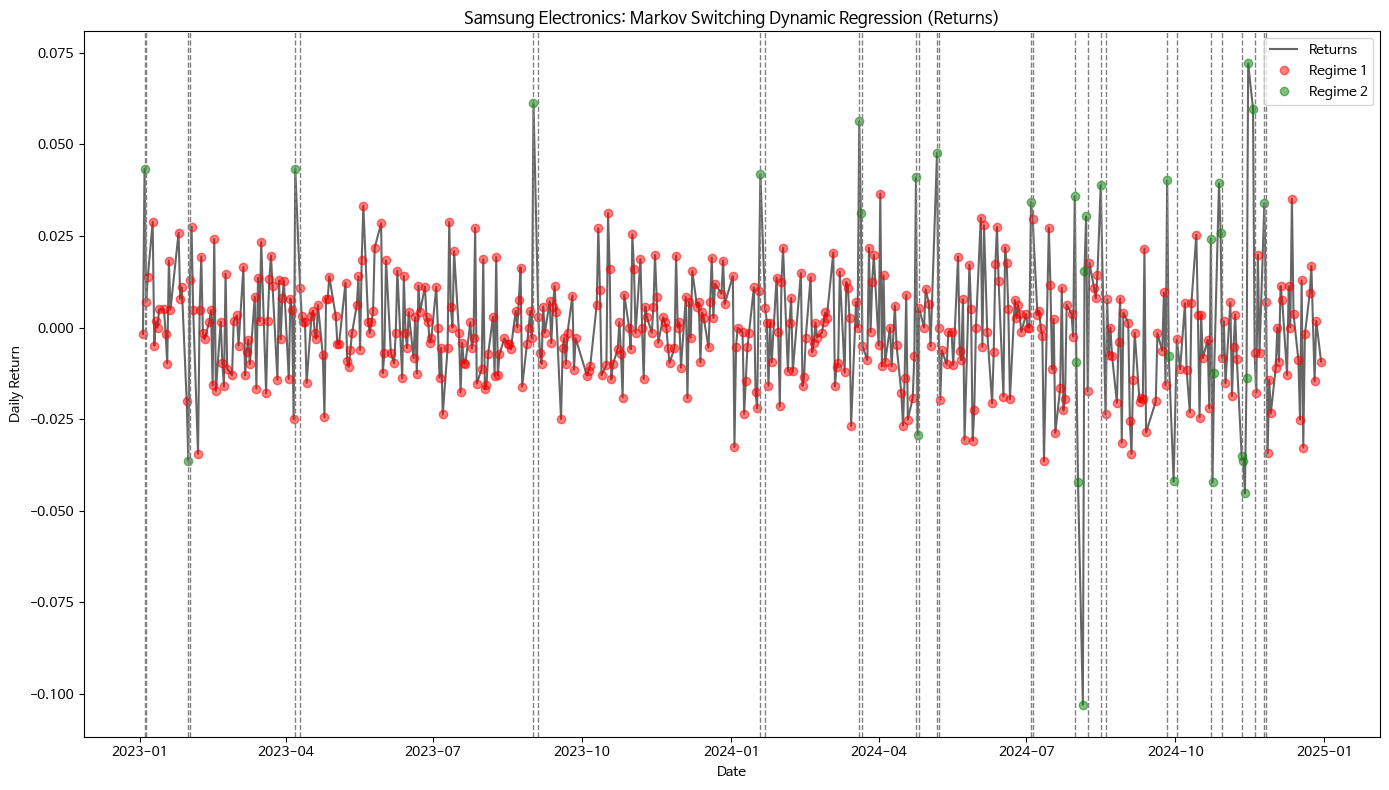

In [9]:
plt.figure(figsize=(14, 8))
plt.plot(dates, returns, label="Observed Returns", color="black", alpha=0.6)
for t in range(len(smoothed_probs)):
    if smoothed_probs.iloc[t, 0] > 0.5:
        plt.plot(dates[t], returns.iloc[t], "ro", alpha=0.5)
    else:
        plt.plot(dates[t], returns.iloc[t], "go", alpha=0.5)

regime_changes = np.argmax(smoothed_probs.values, axis=1)
for i in range(1, len(regime_changes)):
    if regime_changes[i] != regime_changes[i - 1]:
        plt.axvline(x=dates[i], color="gray", linestyle="--", linewidth=1)

plt.title("Samsung Electronics: Markov Switching Dynamic Regression (Returns)")
plt.xlabel("Date")
plt.ylabel("Daily Return")
plt.legend(["Returns", "Regime 1", "Regime 2"])
plt.tight_layout()
plt.show()

## üìà 2. **ÏàòÏùµÎ•† + Ï≤¥Ï†ú ÏãúÍ∞ÅÌôî**

### üîç Ìï¥ÏÑù:

* Í∑∏ÎûòÌîÑÏóêÏÑú **Îπ®Í∞Ñ Ï†ê**ÏùÄ **Regime 1 (Í≥†Î≥ÄÎèôÏÑ±)**, **Ï¥àÎ°ù Ï†ê**ÏùÄ **Regime 0 (Ï†ÄÎ≥ÄÎèôÏÑ±)** ÏúºÎ°ú Î∂ÑÎ•òÎê®
* Îπ®Í∞ÑÏÉâ Ï≤¥Ï†úÍ∞Ä ÎåÄÎ∂ÄÎ∂ÑÏùÑ Ï∞®ÏßÄÌïòÍ≥† ÏûàÏúºÎÇò, Ï§ëÍ∞ÑÏ§ëÍ∞Ñ Ï¥àÎ°ùÏÉâ(ÏïàÏ†ïÍ∏∞)Ïù¥ Î∞òÎ≥µÏ†ÅÏúºÎ°ú ÎÇòÌÉÄÎÇ®
* **ÌöåÏÉâ Ï†êÏÑ†**ÏùÄ **Ï≤¥Ï†ú Ï†ÑÌôò ÏãúÏ†ê**ÏúºÎ°ú, Ï≤¥Ï†úÍ∞Ä ÏûêÏ£º Ï†ÑÌôòÎê® ‚Üí **ÎπàÎ≤àÌïú Íµ¨Ï°∞ Î≥ÄÌôî**


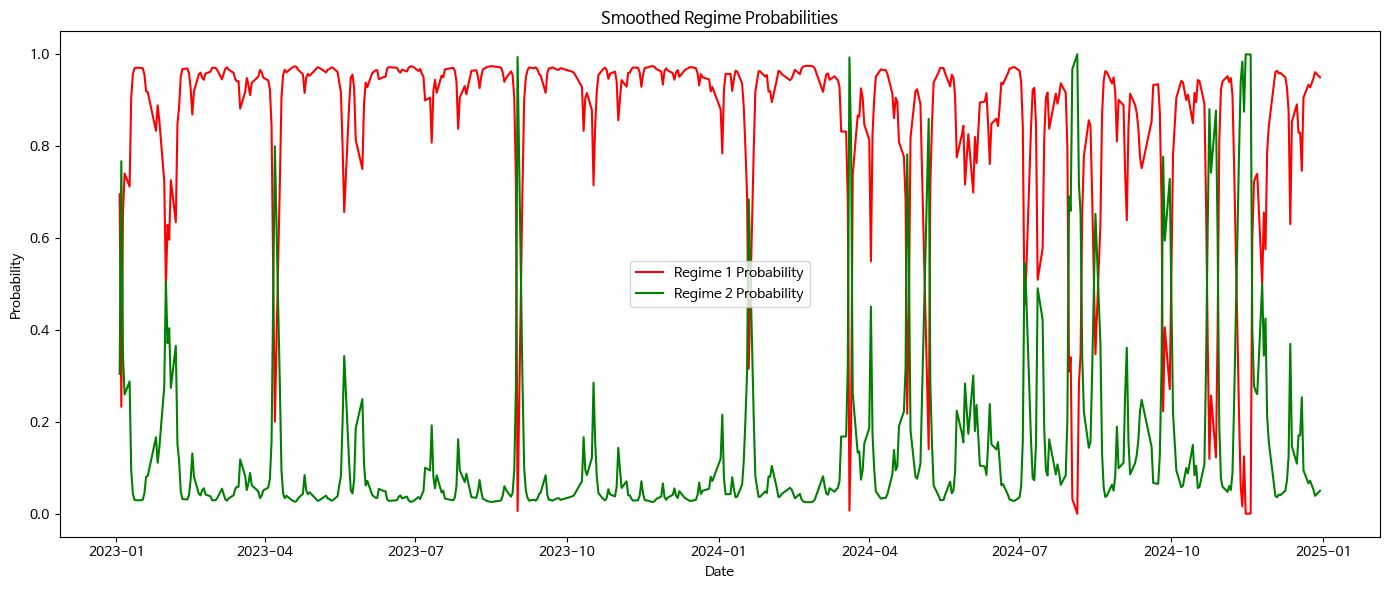

In [10]:
# Ï≤¥Ï†ú ÌôïÎ•† ÏãúÍ∞ÅÌôî
plt.figure(figsize=(14, 6))
plt.plot(dates, smoothed_probs[0], label="Regime 1 Probability", color="red")
plt.plot(dates, smoothed_probs[1], label="Regime 2 Probability", color="green")
plt.xlabel("Date")
plt.ylabel("Probability")
plt.title("Smoothed Regime Probabilities")
plt.legend()
plt.tight_layout()
plt.show()



## üîÅ 3. **Smoothed Regime Probabilities**

### üîç Ìï¥ÏÑù:

* **Regime 1 (Îπ®Í∞ÑÏÑ†)** Ïùò ÌôïÎ•†Ïù¥ ÎåÄÎ∂ÄÎ∂Ñ ÏãúÏ†êÏóêÏÑú **0.9 Ïù¥ÏÉÅ** ‚Üí ÎåÄÎã§ÏàòÍ∞Ä Í≥†Î≥ÄÎèô ÏÉÅÌÉúÎ°ú Ï∂îÏ†ïÎê®
* ÏùºÎ∂Ä Í∏∞Í∞Ñ (Ïòà: 2023ÎÖÑ 3Ïõî, 2024ÎÖÑ 1Ïõî, 2024ÎÖÑ 10Ïõî Îì±)ÏóêÏÑúÎäî **Regime 0 (ÎÖπÏÉâÏÑ†)** Ïù¥ Ïö∞ÏÑ∏Ìï¥Ïßê 
* Ï≤¥Ï†ú Í∞Ñ Ï†ÑÌôòÏù¥ **ÏßßÏùÄ Í∞ÑÍ≤©ÏúºÎ°ú ÎπàÎ≤àÌïòÍ≤å** Î∞úÏÉù ‚Üí **Î≥ÄÎèôÏÑ±Ïù¥ ÌÅ∞ ÏãúÏû• Íµ¨Ï°∞**


## üîß 4. Î∂ÑÏÑù ÏöîÏïΩ Î∞è ÏãúÏÇ¨Ï†ê

| Ìï≠Î™©         | Ìï¥ÏÑù                                                        |
| ---------- | --------------------------------------------------------- |
| **Ï£ºÏöî Ï≤¥Ï†ú**  | ÎåÄÎ∂ÄÎ∂Ñ Regime 1 (Í≥†Î≥ÄÎèôÏÑ±)Ïóê ÏûàÏùå                                   |
| **Ï≤¥Ï†ú Ï†ÑÌôò**  | Ïû¶Í≥† Î∂àÍ∑úÏπôÏ†ÅÏù¥Î©∞, ÌäπÏ†ï Íµ¨Í∞ÑÏóêÏÑ† Î™ÖÌôïÌïú Regime 0 Íµ¨Í∞Ñ Ï°¥Ïû¨                     |
| **Ìà¨Ïûê ÏãúÏÇ¨Ï†ê** | Î≥ÄÎèôÏÑ±Ïù¥ ÌÅ∞ ÏãúÍ∏∞Î•º ÏãùÎ≥ÑÌï¥ Î¶¨Ïä§ÌÅ¨ Í¥ÄÎ¶¨, ÌòÑÍ∏à ÎπÑÏ§ë Ï°∞Ï†à Îì±Ïóê ÌôúÏö© Í∞ÄÎä•                  |
| **ÌïúÍ≥ÑÏ†ê**    | ÏàòÏùµÎ•† ÏûêÏ≤¥Ïùò ÌèâÍ∑†ÏùÄ Îëê Ï≤¥Ï†ú Î™®ÎëêÏóêÏÑú Ïú†ÏùòÌïòÏßÄ ÏïäÏùå ‚Üí Î∞©Ìñ•ÏÑ± Î≥¥Îã§Îäî **Î¶¨Ïä§ÌÅ¨ ÏÉÅÌÉú Íµ¨Î∂Ñ**Ïóê Í∞ïÏ†ê |
